### 4.2 Choose at least 15 cities in the world having land transport connections between them. Calculate the distance matrix for them and then apply the Simulated Annealing method to solve the corresponding Travelling Salesman Problem.

### Visualize the results at the first and the last iteration. If necessary, use the city dataset from https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html¶

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.30000        636.91     0.00%     0.00%     0:00:00     0:00:31 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     7.30000        359.05    12.50%     5.00%     0:00:00     0:00:00



316 mile route:
1, 11, 4, 6, 14, 12, 3, 7, 5, 15, 9, 10, 8, 2, 13


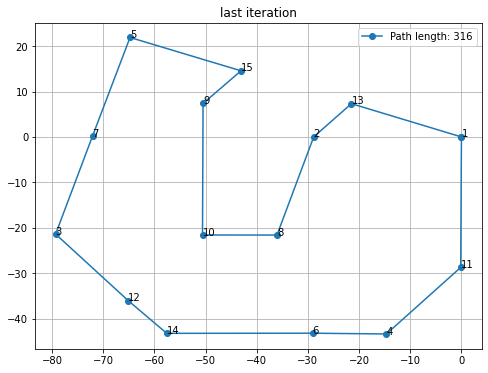

In [17]:
import math
import random
import matplotlib
import numpy as np
import networkx as nx
from simanneal import Annealer
import matplotlib.pyplot as plt
from collections import defaultdict
from __future__ import print_function



def distance(a, b):
    
    """Calculates distance between two cities"""
    
    x_a, y_a = a[:]
    x_b, y_b = b[:]
    
    return np.sqrt((x_a - x_b) ** 2  + (y_a - y_b) ** 2)


class TravellingSalesmanProblem(Annealer):

    """ Test annealer with a travelling salesman problem """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e


if __name__ == '__main__':

    # latitude and longitude for 15 cities from database
    cities = {
        
        '1': (0.00, 0.00),
        '2': (-28.87, 0.00),
        '3': (-79.29, -21.40),
        '4': (-14.66, -43.3896),
        '5': (-64.75, 21.90),
        '6': (-29.06, -43.22),
        '7': (-72.08, 0.18),   
        '8': (-36.04, -21.61),
        '9': (-50.48, 7.37),
        '10': (-50.59, -21.59),
        '11': (-0.14, -28.73),
        '12': (-65.09, -36.06),
        '13': (-21.50, 7.32),
        '14': (-57.57, -43.25),
        '15': (-43.07, 14.56)  
    }

    # initial state, a randomly-ordered itinerary
    init_state = list(cities)
    random.shuffle(init_state)

    # create a distance matrix
    distance_matrix = defaultdict(dict)
    for ka, va in cities.items():
        for kb, vb in cities.items():
            distance_matrix[ka][kb] = 0.0 if kb == ka else distance(va, vb)
                       

    tsp = TravellingSalesmanProblem(init_state, distance_matrix)
    tsp.set_schedule(tsp.auto(minutes=0.05, steps=1))
    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != '1':
        state = state[1:] + state[:1]  # rotate 1-st city to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (8, 6)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label = f"Path length: {int(e)}")

    for i, txt in enumerate(state):
        ax.annotate(txt, (latitude[i], longitude[i]))

    plt.legend()
    plt.title('last iteration')
    plt.grid()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.60000        291.02     7.35%     0.00%     0:00:01    -1:59:59 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.60000        291.02     6.88%     0.01%     0:00:09     0:00:00



291 mile route:
1, 13, 2, 15, 9, 5, 7, 3, 12, 14, 10, 8, 6, 4, 11


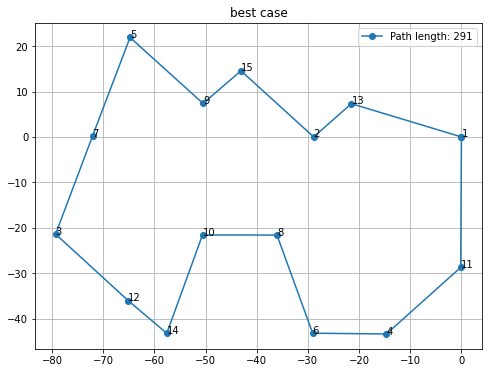

In [18]:
    tsp.set_schedule(tsp.auto(minutes=0.2))

    # since our state is just a list, slice is the fastest way to copy
    tsp.copy_strategy = "slice"
    state, e = tsp.anneal()

    while state[0] != '1':
        state = state[1:] + state[:1]  # rotate 1-st city to start

    print("\n")
    print("%i mile route:" % e)
    print(", ".join(state))

    latitude = [cities[city][0] for city in state] + [cities[state[0]][0]]
    longitude = [cities[city][1] for city in state] + [cities[state[0]][1]]

    plt.rcParams['figure.figsize'] = (8, 6)
    fig, ax = plt.subplots()
    ax.plot(latitude, longitude, "-o", label=f"Path length: {int(e)}")

    for i, txt in enumerate(state):
        ax.annotate(txt, (latitude[i], longitude[i]))

    plt.legend()
    plt.title('best case')
    plt.grid()